In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# 데이터 파악하기
print(digits.images[0])         # 손글씨 이미지 배열
print(digits.images[0].shape)   # 8x8 
print(digits.images.size)       # 115008 / 64 = 1797

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)
115008


In [ ]:
# 레이블 확인하기
print(digits.target[0])

0


In [ ]:
# 손글씨를 이미지화해서 화면에 출력
imglab = list(zip(digits.images, digits.target))
# 손글씨 이미지 배열과 레이블을 합쳐서 리스트로 생성
imglab[:1]

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)]

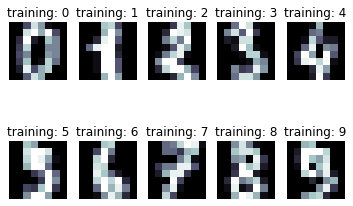

In [ ]:
for ix, (img, lbl) in enumerate(imglab[:10]):
    plt.subplot(2, 5, ix + 1)
    plt.axis(False)
    plt.imshow(img, cmap=plt.cm.bone,
               interpolation='nearest')
    plt.title(f'training: {lbl}')
plt.show()

In [ ]:
digits = load_digits()
dtclf = DecisionTreeClassifier()

data = digits.data
label = digits.target

In [ ]:
dtclf.fit(data, label)

predict = dtclf.predict(data)

print('모델 정확도', accuracy_score(label, predict))    # 이렇게 나오면 안 되는 거죠

모델 정확도 1.0


In [ ]:
# 특성을 7:3으로 나눔
xtrain = digits.data[:1258, ]
xtest = digits.data[1258:, ]
print(xtrain.shape, xtest.shape)

(1258, 64) (539, 64)


In [ ]:
# 레이블 역시 7:3으로 나눔
ytrain = digits.target[:1258, ]
ytest = digits.target[1258:, ]
print(ytrain.shape, ytest.shape)

(1258,) (539,)


In [ ]:
# 의사결정나무
# train, test로 분리한 데이터를 이용해서 모델을 학습시킴
dtclf = DecisionTreeClassifier()

dtclf.fit(xtrain, ytrain)
predict = dtclf.predict(xtest)
print('모델 정확도', accuracy_score(ytest, predict))

모델 정확도 0.7884972170686456


In [ ]:
# train/test 분할시 데이터 비율 확인
print(ytrain)   # 학습용 데이터
print(ytest)    # 평가용 데이터

[0 1 2 ... 3 1 4]
[0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7
 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7
 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7
 9 5 4 8 8 4 9 0 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4
 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0
 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8
 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1
 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7
 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0 8
 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6
 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5
 0 9 5 

In [ ]:
# train/test 분할시 데이터 비율 확인
print(pd.DataFrame(ytrain).value_counts())
print(pd.DataFrame(ytest).value_counts())

3    130
1    129
6    127
5    126
9    125
7    125
4    125
0    125
2    124
8    122
dtype: int64
5    56
4    56
9    55
7    54
6    54
3    53
2    53
1    53
0    53
8    52
dtype: int64


In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

xtrain, xtest, ytrain, ytest = train_test_split(data, label, test_size=0.2, random_state=2201061216)

random_forest = RandomForestClassifier(random_state=2201061216)
random_forest.fit(xtrain, ytrain)
ypred = random_forest.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        40
           3       0.97      0.94      0.96        36
           4       1.00      1.00      1.00        33
           5       0.98      0.98      0.98        41
           6       1.00      1.00      1.00        35
           7       0.94      1.00      0.97        29
           8       0.95      0.90      0.92        41
           9       0.93      0.93      0.93        42

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
# SVM 모델
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(xtrain, ytrain)
ypred = svm_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        30
           2       0.98      1.00      0.99        40
           3       0.97      0.94      0.96        36
           4       1.00      1.00      1.00        33
           5       0.98      0.98      0.98        41
           6       1.00      1.00      1.00        35
           7       0.97      1.00      0.98        29
           8       0.98      0.98      0.98        41
           9       0.95      0.93      0.94        42

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
# SGD 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(xtrain, ytrain)
ypred = sgd_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      0.83      0.91        30
           2       1.00      0.93      0.96        40
           3       1.00      0.92      0.96        36
           4       1.00      1.00      1.00        33
           5       0.95      0.98      0.96        41
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        29
           8       0.73      1.00      0.85        41
           9       0.97      0.88      0.93        42

    accuracy                           0.95       360
   macro avg       0.97      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



In [ ]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(xtrain, ytrain)
ypred = logistic_model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.90      0.93      0.92        30
           2       0.95      0.95      0.95        40
           3       0.90      0.97      0.93        36
           4       0.97      1.00      0.99        33
           5       0.95      0.95      0.95        41
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.98        29
           8       0.95      0.95      0.95        41
           9       0.95      0.88      0.91        42

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 따라서, 의사결정나무를 제외한 나머지 모델은 정확도가 높고 비슷함을 알 수 있음